
# IUCN Red-List Assessment Analysis



### "Established in 1964, the International Union for Conservation of Nature’s Red List of Threatened Species has evolved to become the world’s most comprehensive information source on the global extinction risk status of animal, fungus and plant species. The Red List acts as a “barometer of life”, which measures the pressure acting on species. " (IUCN)

#### Data was downloaded from the IUCN Red List in January 2024. https://www.iucnredlist.org/en
#### Uploaded and Analysed with Python in Jupyter Notebook

## Objective:
#### In this project, I wanted to investigate the overall comprehensiveness of the Red List, and if there are considerations that need to be taken if using the list as a guideline for wildlife conservation actions and measures. 


## Research questions:
1. Which classes have the greatest number of assessed species?
2. What is the assessment status distribution of the classes with the most assessed species, and how many percent of species are threatened in total?
3. Which classes have the least number of assessed species? 
4. What is the distribution of  the total number of assessed species among the classes?
5. Which classes have the greatest number of extinct species?
6. Which classes have the greatest number of threatened species?
7. Is there a correlation between the number of threatened species in a class and the number of assessed species in a class?
8. Which classes have the greatest percentage of threatened species, and what is the average percentage(mean) of thereatened species in a class? (Only including classes with more than 100 assessed species)
9. Which 10 classes have the greatest percentage of extinct species? (Only including classes with more than 100 assessed species)
10. Is there a correlation between the number of threatened species and the percentage of threatened species in the classes?




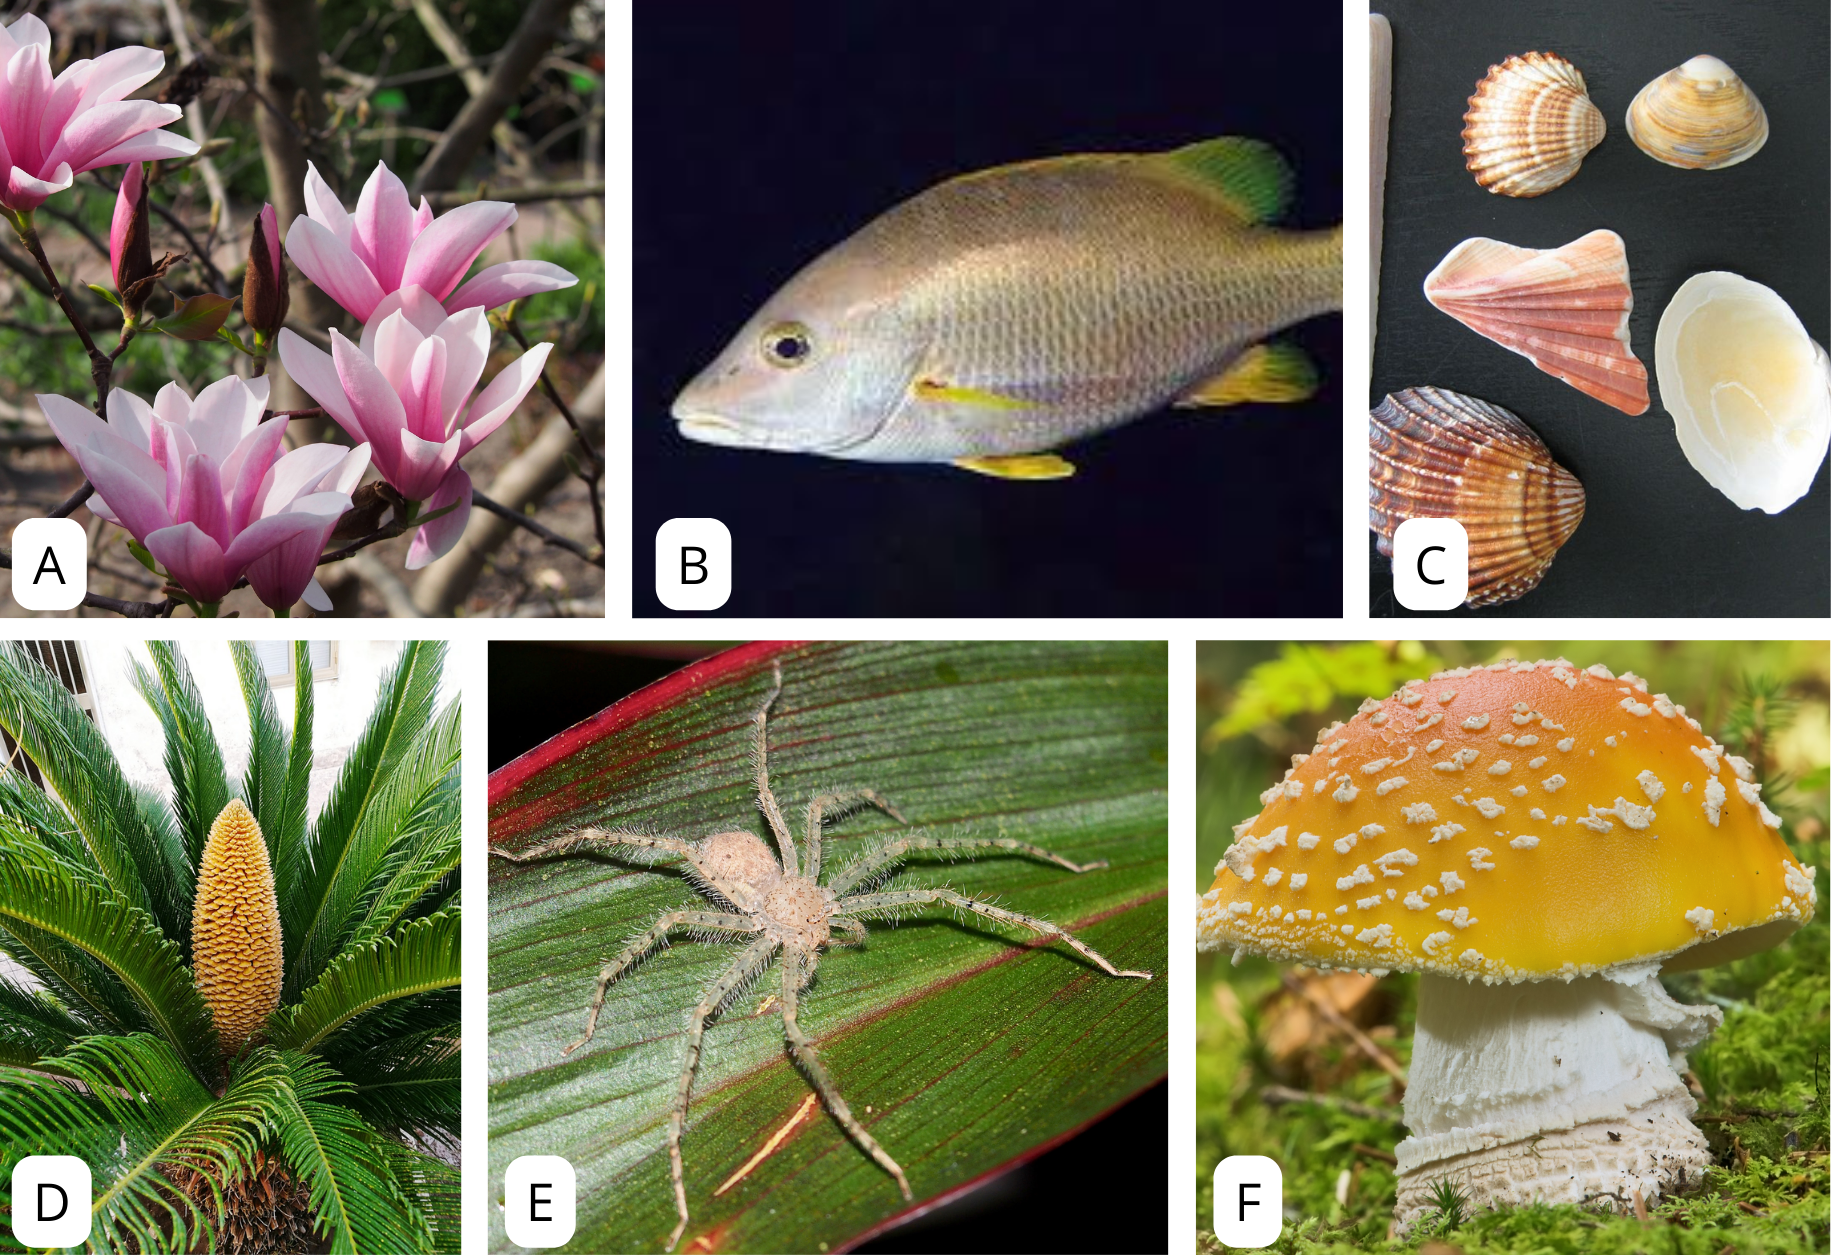 

Figure: A) MAGNOLIOPSIDA (Magnolia Plants), B) ACTINOPTERYGII	(Ray-Finned fish), C) BIVALVIA (class of molluscs), D) CYCADOPSIDA (Cyads), E) ARACHNIDA (Joint-Legged arthropods), F) AGARICOMYCETES (Class of Basidiomycota fungi). Photo source: Creative Commons.



In [2]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline
from scipy.stats import pearsonr

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = [10, 6] 

In [3]:
# Read data
df = pd.read_csv('species_redlist_data.csv', index_col = 0)
df

EX  EW  Subtotal (EX+EW) CR(PE)  CR(PEW)  \
Name                                                         
ACTINOPTERYGII    81  11                92    128        8   
AMPHIBIA          36   2                38    156        1   
ANTHOZOA           0   0                 0      2        0   
ARACHNIDA          9   0                 9     21        0   
ASTEROIDEA         0   0                 0      0        0   
...              ...  ..               ...    ...      ...   
POLYTRICHOPSIDA    0   0                 0      0        0   
SPHAGNOPSIDA       0   0                 0      0        0   
TAKAKIOPSIDA       0   0                 0      0        0   
ULVOPHYCEAE        0   0                 0      0        0   
Total            902  84               986  1,245       60   

                Subtotal (EX+EW+ CR(PE)+CR(PEW))     CR      EN      VU  \
Name                                                                      
ACTINOPTERYGII                               228    697   1,089   1,348   
AMPHIBIA                                     195    722   1,144     740   
ANTHOZOA                                       2     26      27     203   
ARACHNIDA                                     30     73     107      71   
ASTEROIDEA                                     0      1       0       0   
...                                          ...    ...     ...     ...   
POLYTRICHOPSIDA                                0      0       0       0   
SPHAGNOPSIDA                                   0      6       3       4   
TAKAKIOPSIDA                                   0      0       0       1   
ULVOPHYCEAE                                    0      0       0       0   
Total                                      2,291  9,251  16,364  16,493   

                Subtotal (threatened spp.)  LR/cd NT or LR/nt LC or LR/lc  \
Name                                                                        
ACTINOPTERYGII                       3,134      0         714      15,269   
AMPHIBIA                             2,606      0         406       3,291   
ANTHOZOA                               256      0         180         280   
ARACHNIDA                              251      0          23          94   
ASTEROIDEA                               1      0           0           0   
...                                    ...    ...         ...         ...   
POLYTRICHOPSIDA                          0      0           1           0   
SPHAGNOPSIDA                            13      0           0           3   
TAKAKIOPSIDA                             1      0           0           0   
ULVOPHYCEAE                              0      0           0           0   
Total                               42,108    152       8,816      77,491   

                     DD    Total  
Name                              
ACTINOPTERYGII    4,786   23,995  
AMPHIBIA          1,145    7,486  
ANTHOZOA            135      851  
ARACHNIDA            64      441  
ASTEROIDEA            0        1  
...                 ...      ...  
POLYTRICHOPSIDA       0        1  
SPHAGNOPSIDA          1       17  
TAKAKIOPSIDA          0        1  
ULVOPHYCEAE           1        1  
Total            20,835  150,388  

[70 rows x 15 columns]

In [4]:
# Check for missing values
df.isnull().sum() # No missing values found

EX                                  0
EW                                  0
Subtotal (EX+EW)                    0
CR(PE)                              0
CR(PEW)                             0
Subtotal (EX+EW+ CR(PE)+CR(PEW))    0
CR                                  0
EN                                  0
VU                                  0
Subtotal (threatened spp.)          0
LR/cd                               0
NT or LR/nt                         0
LC or LR/lc                         0
DD                                  0
Total                               0
dtype: int64

In [5]:
df = df.replace({',':''}, regex=True) # remove commas in dataset
df.drop(df.tail(1).index,inplace=True) # drop last n row (total row)
df = df.drop('NOT ASSIGNED') # drop rows "Not assigned"
df = df.astype(float) # change datatype to floats

### 1. Which classes have the greatest number of assessed species?

In [6]:
print('Total number of classes:', len(df))

Total number of classes: 68


In [7]:
# Create a new list with column Total
total_listings = df[['Total']].astype(float) # change dtype to float to correct sorting
most_assessed = total_listings.sort_values(by=['Total'], ascending = False).head(10) # sort numbers, get top 10

In [8]:
# Rename index for table
common_name = {'MAGNOLIOPSIDA':'Magnolia Plants', 'ACTINOPTERYGII':'Ray-Finned Fish', 'INSECTA':'Insects', 'AVES':'Birds', 'REPTILIA':'Reptiles', 'LILIOPSIDA':'Monocot Plants', 'AMPHIBIA':'Amphibians', 'GASTROPODA':'Snails and Slugs', 'MAMMALIA':'Mammals', 'MALACOSTRACA':'Soft Shells'}
most_assessed= most_assessed.rename(index=common_name)

In [10]:
# Sort after Kingdom
most_assessed['Kingdom'] = ['Plant', 'Animal', 'Animal', 'Animal', 'Animal', 'Plant', 'Animal', 'Animal','Animal', 'Animal']

# View
most_assessed

Total Kingdom
Name                             
Magnolia Plants   51471.0   Plant
Ray-Finned Fish   23995.0  Animal
Insects           12441.0  Animal
Birds             11188.0  Animal
Reptiles          10222.0  Animal
Monocot Plants     8999.0   Plant
Amphibians         7486.0  Animal
Snails and Slugs   7458.0  Animal
Mammals            5973.0  Animal
Soft Shells        3027.0  Animal

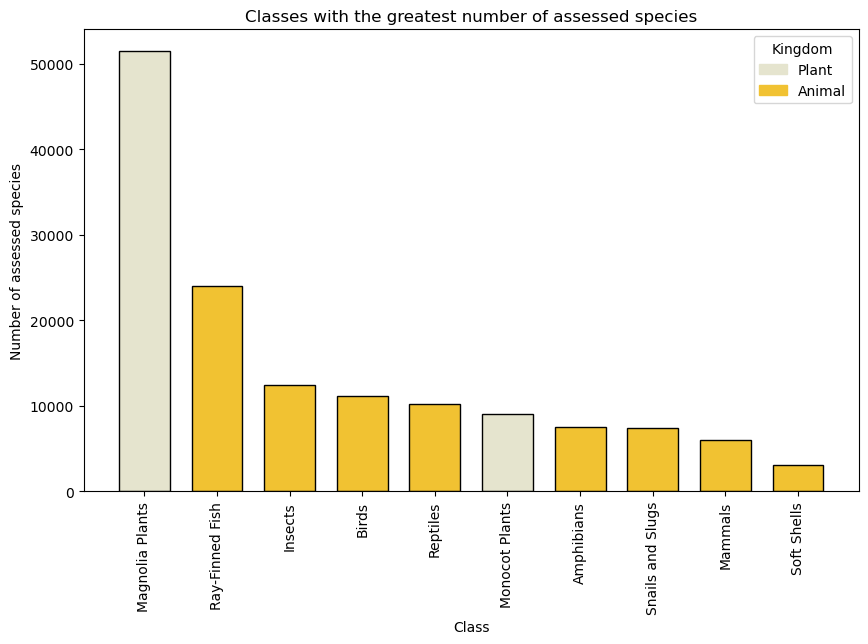

In [13]:
# Color-code the Kingdoms to use in figure
col = []
for val in most_assessed['Kingdom']:
    if val == 'Plant':
        col.append('#e5e4ce')
    else:
        col.append('#f1c232')

# Plot bar
plt.bar(most_assessed.index, most_assessed['Total'], width=0.7, color=col, edgecolor = 'black') 

plt.title('Classes with the greatest number of assessed species', size = 12)
plt.ylabel("Number of assessed species")
plt.xlabel("Class")
plt.xticks(rotation=90)


# Create custom legend 
green_patch = mpatches.Patch(color='#e5e4ce', label='Plant')
orange_patch = mpatches.Patch(color='#f1c232', label='Animal')
plt.legend(handles=[green_patch, orange_patch], title='Kingdom')


plt.show()

### 2.  What is the assessment staus distribution of the classes with the most assessed species?

In [14]:
# Create a new coloumn containing the sum of the columns 'Conservation_dependent' + 'Least_Risk' + 'Least_Consern'
df['Conservation_dependent/Least_Risk/Least_Consern'] = df['Total'] -(df['Subtotal (EX+EW)'] + df['Subtotal (threatened spp.)'] + df['DD'])

In [15]:
# Create a new table with selected column categories
EX_TH_LC_TOT = df[['Subtotal (EX+EW+ CR(PE)+CR(PEW))', 'Subtotal (threatened spp.)', 'Conservation_dependent/Least_Risk/Least_Consern', 'Total', 'DD']]

In [16]:
# Rename index for table
EX_TH_LC_TOT = EX_TH_LC_TOT.rename(index=common_name)

In [17]:
# Order decending by Total, showing 10 rows with highest values
EX_TH_LC_TOT = EX_TH_LC_TOT.sort_values(by = 'Total', ascending = False ).head(10)
EX_TH_LC = EX_TH_LC_TOT.drop(columns=['Total'])
# Renaming columns 
EX_TH_LC = EX_TH_LC.rename(columns={'DD': 'Data_Deficient', 'Subtotal (threatened spp.)': 'Threatened', 'Subtotal (EX+EW+ CR(PE)+CR(PEW))':'Extinct (EX+EW)'})

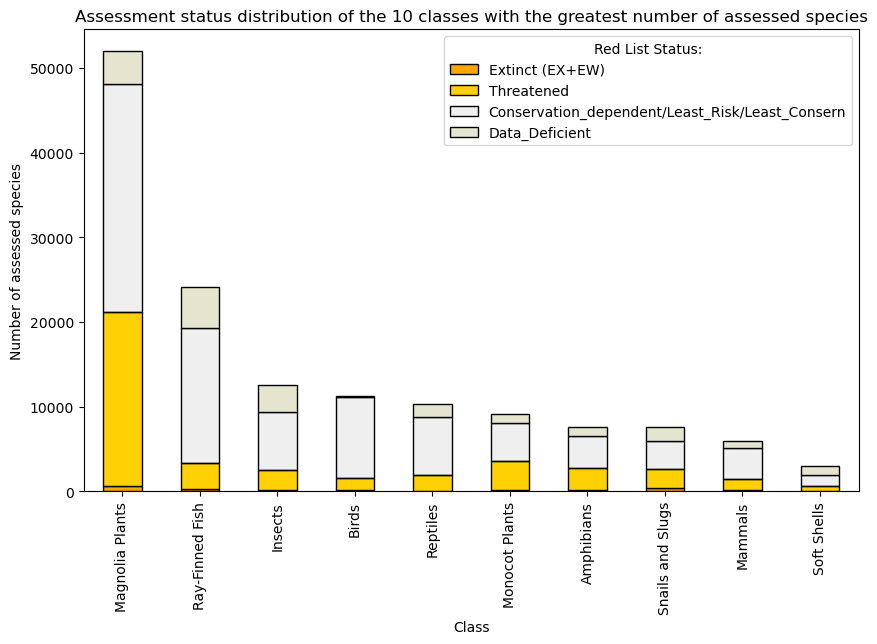

In [98]:
# Create color map for the different categories for the bar chart

color_map = {
    'Data_Deficient': '#e5e4ce',
    'Threatened': '#ffd003',
    'Extinct (EX+EW)': 'orange',
    'Conservation_depended/Least_Risk/Least_Consern':'#bec78d'
}

colors = [color_map[col] if col in color_map else '#1111' for col in EX_TH_LC.columns]

# Plot stacked bar chart
EX_TH_LC.plot(kind='bar', stacked=True, color = colors, edgecolor = 'black')

plt.title('Assessment status distribution of the 10 classes with the greatest number of assessed species')
plt.xlabel('Class')  
plt.ylabel('Number of assessed species')
plt.legend(title='Red List Status:')

plt.show()

In [78]:
# Find total percentage of threatened species (not inluding extinct)
Percentage_threatened = (100/(150388-2291)*42108)
print(int(Percentage_threatened),"percent of all species are threatened")

28 percent of all species are threatened


## 3.  Which classes have less than 20 assessed species?

In [20]:
# Filter the df and select specific column
under_20_df = df[df['Total'] < 20][['Total']]

# Sort
sorted_under_20_df = under_20_df.sort_values(by='Name')

# Display all classes wwth less than 20 assessed species
sorted_under_20_df

Total
Name                    
ANDREAEOPSIDA        3.0
ANTHOCEROTOPSIDA     3.0
ARTHONIOMYCETES      3.0
ASTEROIDEA           1.0
CHAROPHYACEAE       14.0
CHILOPODA           11.0
CHLOROPHYCEAE        1.0
COLLEMBOLA           9.0
DOTHIDEOMYCETES      2.0
ECHINOIDEA           1.0
ENOPLA               6.0
EUROTIOMYCETES       6.0
EXOBASIDIOMYCETES    1.0
GEOGLOSSOMYCETES     4.0
GINKGOOPSIDA         1.0
HYDROZOA            17.0
LEOTIOMYCETES        8.0
MARCHANTIOPSIDA     13.0
MEROSTOMATA          4.0
MONOPLACOPHORA       1.0
OSTRACODA           13.0
PEZIZOMYCETES       12.0
PHAEOPHYCEAE        15.0
POLYCHAETA           2.0
POLYPLACOPHORA       2.0
POLYTRICHOPSIDA      1.0
SARCOPTERYGII        8.0
SOLENOGASTRES        4.0
SORDARIOMYCETES      8.0
SPHAGNOPSIDA        17.0
TAKAKIOPSIDA         1.0
TURBELLARIA          1.0
UDEONYCHOPHORA      11.0
ULVOPHYCEAE          1.0
USTILAGINOMYCETES    4.0

In [21]:
 # How many classes have less than 20 species assessed?
under_20_df.count() # 35 out of 68 classes have less than 20 assessed species.

Total    35
dtype: int64

## 4. What is the distrubution of  the total number of assessed species among the classes?

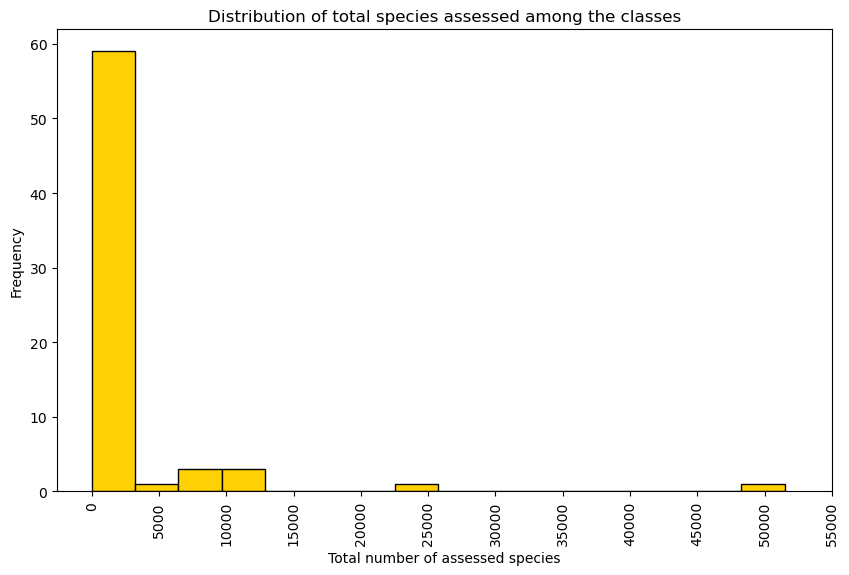

In [95]:
# Plot histogram to show distribution
plt.hist(total_listings['Total'], bins=16, edgecolor='black', color = '#ffd003') 

plt.title('Distribution of total species assessed among the classes')
plt.xlabel('Total number of assessed species')
plt.ylabel('Frequency')

# Set x-axis ticks to show every 5000 counts
xmax = max(total_listings['Total'])  # Find the maximum value 
xticks = list(range(0, int(xmax)+5000, 5000))  
plt.xticks(ticks=xticks)
plt.xticks(rotation = 90)

plt.show()

In [23]:
# Get statistics of distribution
df['Total'].describe() # Huge span in number of assessed speices in a class with most classes havig few assessed species. 

count       68.000000
mean      2211.573529
std       7247.754945
min          1.000000
25%          4.000000
50%         17.000000
75%        453.500000
max      51471.000000
Name: Total, dtype: float64

## 5.  Which classes have the greatest number of exinct species?

In [24]:
# Find number of classes with extinct species(EX+EX)
df.loc[df['Subtotal (EX+EW)'] >0, 'Subtotal (EX+EW)'].count() # 23 classes out of 68 contains extinct species

23

In [25]:
# Create new df with extinct(EX+EW) species
Exstinct= df[['Subtotal (EX+EW)']]
Exstinct_taxa_10 = Exstinct.sort_values(by=['Subtotal (EX+EW)'],ascending=False).head(10)
#Exstinct_taxa_10 

In [26]:
# Make a new "name" column for classes with commom names
Exstinct_taxa_10['Name'] = ['Snails and Slugs', 'Birds', 'Magnolia Plants', 'Ray-Finned Fish', 'Mammals', 'Insects','Amphibians', 'Reptils', 'Soft Shells', 'Monocot Plants']
# Display df
Exstinct_taxa_10 

Subtotal (EX+EW)              Name
Name                                              
GASTROPODA                 281.0  Snails and Slugs
AVES                       164.0             Birds
MAGNOLIOPSIDA              135.0   Magnolia Plants
ACTINOPTERYGII              92.0   Ray-Finned Fish
MAMMALIA                    87.0           Mammals
INSECTA                     60.0           Insects
AMPHIBIA                    38.0        Amphibians
REPTILIA                    34.0           Reptils
BIVALVIA                    32.0       Soft Shells
LILIOPSIDA                  22.0    Monocot Plants

In [27]:
# Make a new column with assigned Kingdoms for classes
Exstinct_taxa_10['Kingdom'] = ['Animal', 'Animal', 'Plant', 'Animal', 'Animal', 'Animal', 'Animal', 'Animal','Animal', 'Plant']

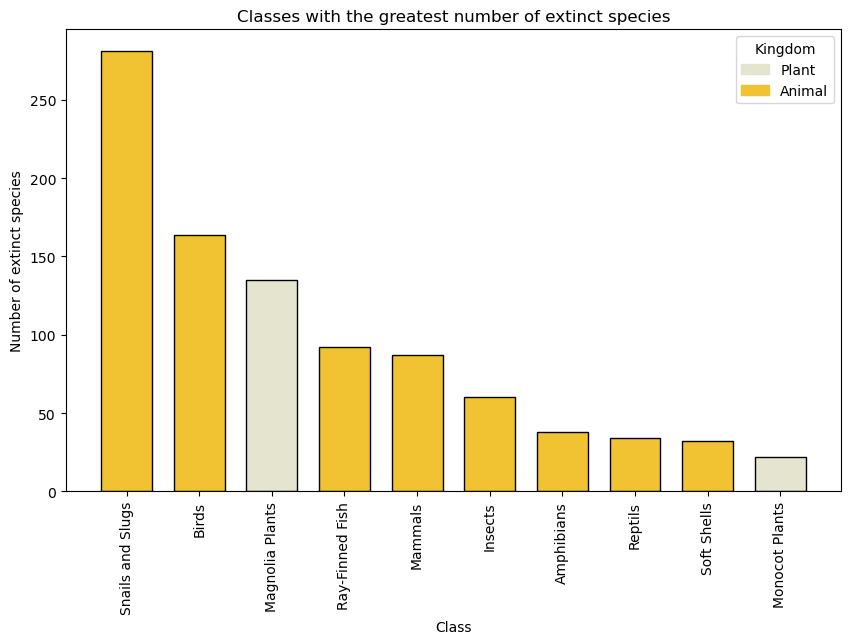

In [28]:
# Create color-code for Kingdoms
col = []
for val in Exstinct_taxa_10['Kingdom']:
    if val == 'Animal':
        col.append('#f1c232')
    else:
        col.append('#e5e4ce')


# Plot bar
plt.bar(Exstinct_taxa_10['Name'], Exstinct_taxa_10['Subtotal (EX+EW)'], width=0.7, color = col, edgecolor = 'black') 

plt.title('Classes with the greatest number of extinct species', size = 12) 
plt.ylabel("Number of extinct species")
plt.xlabel("Class")
plt.xticks(rotation=90)

# Create custom legend
green_patch = mpatches.Patch(color='#e5e4ce', label='Plant')
orange_patch = mpatches.Patch(color='#f1c232', label='Animal')
plt.legend(handles=[green_patch, orange_patch], title='Kingdom')

plt.show()

<div>
<img src="attachment:image-2.png" width="500"/>
</div>


## 6. Which classes have the greatest number of threatened species?

In [29]:
# Find number of classes with threatened species
df.loc[df['Subtotal (threatened spp.)'] > 0, 'Subtotal (threatened spp.)'].count() 
#61 our of 68 classes in the red list contains species with the status threatened

61

In [30]:
# Create a df for top 10 threatened species
Threatened_species= df[['Subtotal (threatened spp.)']]
Threatened_species_10 = Threatened_species.sort_values(by=['Subtotal (threatened spp.)'],ascending=False).head(10)
#Threatened_species_10

In [31]:
# Make a new "Name" column for classes with common names
Threatened_species_10['Name'] = ['Magnolia Plants', 'Monocot Plants', 'Ray-Finned Fish', 'Amphibians', 'Insects','Snails & Slugs', 'Reptils', 'Birds', 'Mammals', 'Soft-Shells']
# Display df
Threatened_species_10

Subtotal (threatened spp.)             Name
Name                                                       
MAGNOLIOPSIDA                      20551.0  Magnolia Plants
LILIOPSIDA                          3449.0   Monocot Plants
ACTINOPTERYGII                      3134.0  Ray-Finned Fish
AMPHIBIA                            2606.0       Amphibians
INSECTA                             2345.0          Insects
GASTROPODA                          2178.0   Snails & Slugs
REPTILIA                            1842.0          Reptils
AVES                                1400.0            Birds
MAMMALIA                            1340.0          Mammals
MALACOSTRACA                         613.0      Soft-Shells

In [32]:
# Make a new column with assigned Kingdoms for classes
Threatened_species_10['Kingdom'] = ['Plant', 'Plant', 'Animal', 'Animal', 'Animal', 'Animal', 'Animal', 'Animal','Animal', 'Animal']

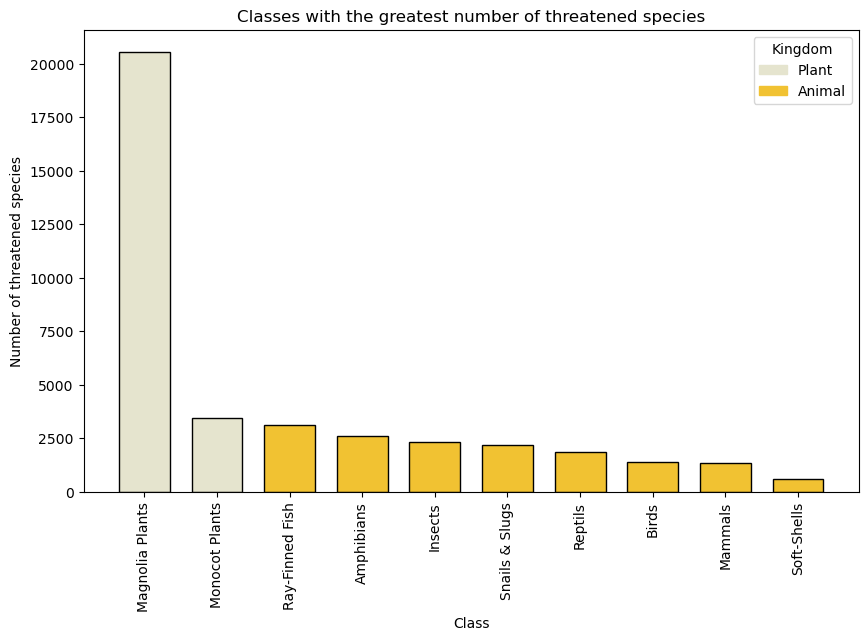

In [94]:
# Create color-code for Kingdoms
col = []
for val in Threatened_species_10['Kingdom']:
    if val == 'Animal':
        col.append('#f1c232')
    else:
        col.append('#e5e4ce')
# Pli=ot bar
plt.bar(Threatened_species_10['Name'], Threatened_species_10['Subtotal (threatened spp.)'], width=0.7, color = col, edgecolor = 'black') # create a simple bar chart#color = col_map.colors

plt.title('Classes with the greatest number of threatened species', size = 12) 
plt.ylabel("Number of threatened species")
plt.xlabel("Class")
plt.xticks(rotation=90)

# Create custom legend
green_patch = mpatches.Patch(color='#e5e4ce', label='Plant')
orange_patch = mpatches.Patch(color='#f1c232', label='Animal')
plt.legend(handles=[green_patch, orange_patch], title='Kingdom')

plt.show()

## 7.  Is there a correlation between number of  threatened species in a class and the number of assessed species in a class?

Text(0.5, 1.0, 'Correlation: Number of total assessed species pr. class and number of threatened species')

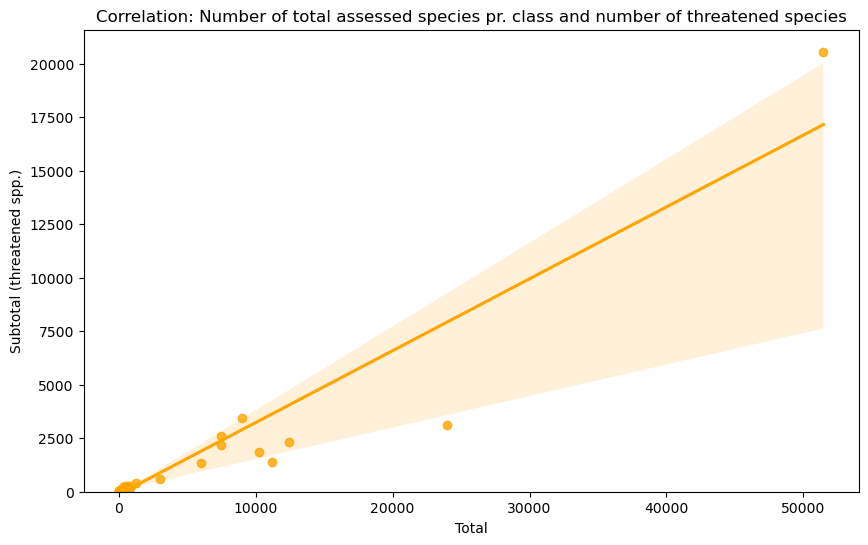

In [34]:
# Find correlation between total assessed  vs number of threatened species for taxa
sns.regplot(x='Total', y ='Subtotal (threatened spp.)', data = df, color = 'orange')
plt.ylim(0,)
plt.title('Correlation: Number of total assessed species pr. class and number of threatened species')

In [35]:
# Find correlation and p-value 
pearsonr(df['Total'], df['Subtotal (threatened spp.)']) 
# There is a correlation between the number of assessed species in a class and the number of threatened species.

PearsonRResult(statistic=0.9462696565899555, pvalue=4.515565074617712e-34)

## 8. Which 10 classes have the greatest percentage of threatened species and what is the average percentage of threatened species in a class?
### (Only including classes with more than 100 assessed species)

In [38]:
# Create new column with percent of threatenes species per class
df['Total_Threatened_perc'] = 100/(df['Total'] / df['Subtotal (threatened spp.)']) 

In [39]:
# Filter rows where 'Total' is more than 100 and select specific columns
df_perc = df.loc[df['Total'] > 100, ['Total_Threatened_perc', 'Total']]

In [93]:
# What is the average percentage of threatened species for classes with more than 100 assessed species?
len(df_perc)
average_threatened_perc = df_perc.Total_Threatened_perc.sum()
average_threatened_perc = average_threatened_perc/25
print('Average percent of threatened species in classes with more than 100 assessed species:',average_threatened_perc)

Average percent of threatened species in classes with more than 100 assessed species: 30.91438797076681


In [83]:
# Make a list of all the classes and show percentage of threatened species comapred to the total number of assessed species.
df_perc_order = df_perc.sort_values('Total')
df_perc_order

Total_Threatened_perc    Total
Name                                             
JUNGERMANNIOPSIDA              58.252427    103.0
LYCOPODIOPSIDA                 40.000000    105.0
BRYOPSIDA                      51.063830    188.0
CLITELLATA                     12.162162    222.0
DIPLOPODA                      33.606557    244.0
CYCADOPSIDA                    66.765579    337.0
HOLOTHUROIDEA                   4.312668    371.0
ARACHNIDA                      56.916100    441.0
AGARICOMYCETES                 41.344196    491.0
PINOPSIDA                      33.606557    610.0
POLYPODIOPSIDA                 38.317757    642.0
CEPHALOPODA                     0.666667    750.0
BIVALVIA                       26.193390    817.0
ANTHOZOA                       30.082256    851.0
CHONDRICHTHYES                 32.171799   1234.0
MALACOSTRACA                   20.251074   3027.0
MAMMALIA                       22.434288   5973.0
GASTROPODA                     29.203540   7458.0
AMPHIBIA                       34.811648   7486.0
LILIOPSIDA                     38.326481   8999.0
REPTILIA                       18.019957  10222.0
AVES                           12.513407  11188.0
INSECTA                        18.848967  12441.0
ACTINOPTERYGII                 13.061054  23995.0
MAGNOLIOPSIDA                  39.927338  51471.0

In [91]:
# Exploring the average percenage of threatened species in classes with less than 100 assessed species:
df_perc_less = df.loc[df['Total'] < 100, ['Total_Threatened_perc', 'Total']]
df_perc_less  = df_perc_less.sort_values('Total')
len(df_perc_less)
average_threatened_perc_less = df_perc_less.Total_Threatened_perc.sum()
average_threatened_perc_less = average_threatened_perc_less/43
print('Average pecentage of classes with less than 100 assessed species:', average_threatened_perc_less)

Average pecentage of classes with less than 100 assessed species: 49.91160698905735


In [40]:
# Finding the 10 classes with the highest percentage of threatened species (with more than 100 assessed species)
# Sort df by 'Total_Threatened_perc' in descending order
df_perc_sorted = df_perc.sort_values(by='Total_Threatened_perc', ascending = False).head(10)

In [41]:
# Create new "Name" column for classes
df_perc_sorted['Name']= ['Cycads', 'Jungermanniopsida (Liverworts)',  'Joint-legged arthropods', 'Bryopsida (Mosses)', 'Agaricomycetes', 'Clubmosses', 'Magnolia Plants', 'Monocot Plants', 'Ferns', 'Amphibians']

In [42]:
# Assign kingdoms for classes
df_perc_sorted['Kingdom'] =['Plant', 'Plant', 'Animal', 'Plant', 'Fungi', 'Plant', 'Plant', 'Plant', 'Plant', 'Animal']
# Dislplay df
df_perc_sorted

Total_Threatened_perc    Total  \
Name                                                
CYCADOPSIDA                    66.765579    337.0   
JUNGERMANNIOPSIDA              58.252427    103.0   
ARACHNIDA                      56.916100    441.0   
BRYOPSIDA                      51.063830    188.0   
AGARICOMYCETES                 41.344196    491.0   
LYCOPODIOPSIDA                 40.000000    105.0   
MAGNOLIOPSIDA                  39.927338  51471.0   
LILIOPSIDA                     38.326481   8999.0   
POLYPODIOPSIDA                 38.317757    642.0   
AMPHIBIA                       34.811648   7486.0   

                                             Name Kingdom  
Name                                                       
CYCADOPSIDA                                Cycads   Plant  
JUNGERMANNIOPSIDA  Jungermanniopsida (Liverworts)   Plant  
ARACHNIDA                 Joint-legged arthropods  Animal  
BRYOPSIDA                      Bryopsida (Mosses)   Plant  
AGARICOMYCETES                     Agaricomycetes   Fungi  
LYCOPODIOPSIDA                         Clubmosses   Plant  
MAGNOLIOPSIDA                     Magnolia Plants   Plant  
LILIOPSIDA                         Monocot Plants   Plant  
POLYPODIOPSIDA                              Ferns   Plant  
AMPHIBIA                               Amphibians  Animal

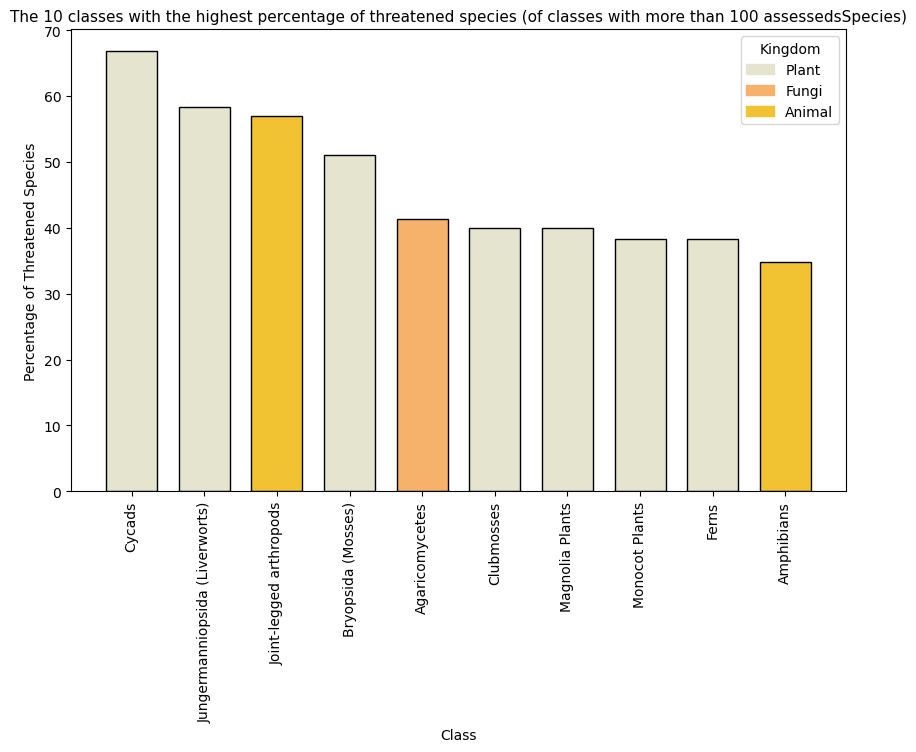

In [100]:
# Create color-code for Kingdoms
col = []
for val in df_perc_sorted['Kingdom']:
    if val == 'Animal':
        col.append('#f1c232')
    elif val == 'Fungi':
        col.append("#f6b26b")
    else:
        col.append('#e5e4ce')

# Create a bar chart 
plt.bar(df_perc_sorted['Name'], df_perc_sorted['Total_Threatened_perc'], width=0.7, color=col, edgecolor='black')

plt.ylabel("Percentage of Threatened Species")  
plt.xlabel("Class")  
plt.xticks(rotation=90)

plt.title('The 10 classes with the highest percentage of threatened species (of classes with more than 100 assessedsSpecies)', fontsize=11)

# Create custom legend
green_patch = mpatches.Patch(color='#e5e4ce', label='Plant')
orange_patch = mpatches.Patch(color='#f1c232', label='Animal')
darker_orange_patch = mpatches.Patch(color = '#f6b26b', label = 'Fungi')                                 
plt.legend(handles=[green_patch, darker_orange_patch, orange_patch], title='Kingdom')

plt.show()

## 9.  Which 10 classes have the greatest percentage of extinct species?
### (Only including classes with more than 100 assessed species)

In [44]:
# Create new column with percent of extinct(EX+EW) species per class
df['Total_Extinct_perc'] = 100/(df['Total'] / df['Subtotal (EX+EW)']) 

In [45]:
# Filter rows where 'Total' is more than 20 and select specific columns
df_perc_ex = df.loc[df['Total'] > 100, ['Total_Extinct_perc', 'Total']]

In [46]:
# Sort by 'Total_Threatened_perc' in descending order
df_perc_ex_sorted = df_perc_ex.sort_values(by='Total_Extinct_perc', ascending = False).head(10)

In [47]:
# Create new "Name" column for classes with common names
df_perc_ex_sorted['Name'] = ['Bilvalvia (Molluscs)', 'Slugs and Snails', 'Bryopsida (Mosses)', 'Joint-legged arthropods', 'Cyads', 'Birds', 'Mammals', 'Millipedes (Arthropods)','Clitellata (Annelid worms)', 'Amphibians']

In [48]:
# Assign kingdoms to classes
df_perc_ex_sorted['Kingdom'] = ['Animal', 'Animal', 'Plant', 'Animal', 'Plant', 'Animal', 'Animal', 'Animal', 'Animal', 'Animal']
# Display df
df_perc_ex_sorted

Total_Extinct_perc    Total                        Name Kingdom
Name                                                                        
BIVALVIA               3.916769    817.0        Bilvalvia (Molluscs)  Animal
GASTROPODA             3.767766   7458.0            Slugs and Snails  Animal
BRYOPSIDA              2.127660    188.0          Bryopsida (Mosses)   Plant
ARACHNIDA              2.040816    441.0     Joint-legged arthropods  Animal
CYCADOPSIDA            1.483680    337.0                       Cyads   Plant
AVES                   1.465856  11188.0                       Birds  Animal
MAMMALIA               1.456554   5973.0                     Mammals  Animal
DIPLOPODA              1.229508    244.0     Millipedes (Arthropods)  Animal
CLITELLATA             0.900901    222.0  Clitellata (Annelid worms)  Animal
AMPHIBIA               0.507614   7486.0                  Amphibians  Animal

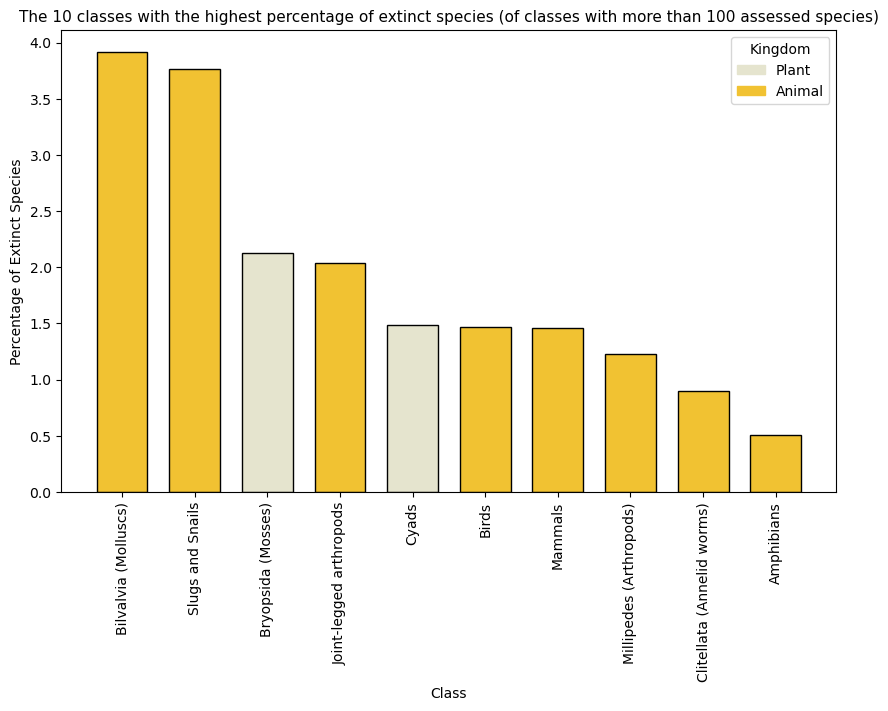

In [97]:
# Create color-code for Kingdoms
col = []
for val in df_perc_ex_sorted['Kingdom']:
    if val == 'Animal':
        col.append('#f1c232')
    else:
        col.append('#e5e4ce')

# Create a bar chart with custom colors
plt.bar(df_perc_ex_sorted['Name'], df_perc_ex_sorted['Total_Extinct_perc'], width= 0.7, color=col, edgecolor='black')

plt.ylabel("Percentage of Extinct Species")  
plt.xlabel("Class")  
plt.xticks(rotation=90)

# Add overall title
plt.title('The 10 classes with the highest percentage of extinct species (of classes with more than 100 assessed species)', fontsize=11)

# Create custom legend
green_patch = mpatches.Patch(color='#e5e4ce', label='Plant')
orange_patch = mpatches.Patch(color='#f1c232', label='Animal')                              
plt.legend(handles=[green_patch, orange_patch], title='Kingdom')

## 10. Is there a correlation between number of threatened species and percentage of threatened species in the classes? (Only including classes with more than 20 assessed species)

In [50]:
# Filter rows where 'Total' is more than 20
df_new2 = df.loc[df['Total'] > 20]
# Checking to make sure there are min 30 rows left in order to calculate a correlation
df_new2.shape

(33, 18)

Text(0.5, 1.0, 'Correlation between number of threatened species pr. class and percentage of threatened species pr. class')

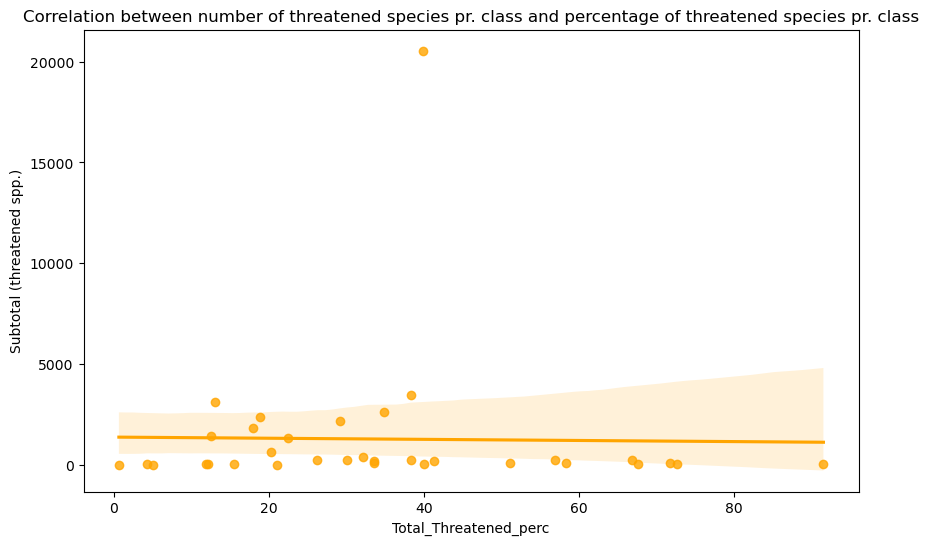

In [51]:
# Correlation total assessed vs extinct taxa
sns.regplot(x='Total_Threatened_perc', y = 'Subtotal (threatened spp.)', data = df_new2, color = 'orange')
plt.title('Correlation between number of threatened species pr. class and percentage of threatened species pr. class')

In [52]:
# Find correlation and p-value 
pearsonr(df_new2['Total_Threatened_perc'], df_new2['Subtotal (threatened spp.)'])
# No correlation found, a higher number f threatened species in a class does ot correlate with a higher percentage of threatened species

PearsonRResult(statistic=-0.017310663080922387, pvalue=0.9238264597333492)

## Results:
1. Magnolia Plants and Ray-Finned Fish were the classes with the most assessed species. 
2. The majority of the species had the status Conservation Dependent/Least Risk/Least Concern, followed by Threatened and Data Deficient. In total 28% of all species were threatened.
3. There were many classes with few assessed species. In total, there were 35 classes out of 68 classes with less than 20 assessed species. 
4. The number of assessed species per class varied greatly from 1 to 51471 species.  Most of the 68 classes included in the Red List had few assessed species, with 75% of the classes having less than 454 assessed species, and 50% of the classes less than 17. 
5. Snails and Slugs, followed by Birds, and Magnolia Plants had the greatest number of extinct species.
6. Magnolia Plants had by far the greatest number of threatened species.
7. There was a strong correlation between the number of assessed species in a class and the number of threatened species in the same class. 
8. The class of plants Cyads had the greatest percentage of threatened species. Plants dominated the 10 classes with the greatest percentage of threatened species. Of animals, Joint-legged Arthropods had the greatest percentage of threatened species, while it in the Fungi Kingdom were Agaricomycetes. On average, 30 percent of species in a class are under threat.
9. Bivalvia, a class of freshwater and marine molluscs had the greatest percentage of extinct species, closely followed by Snails and Slugs.  Classes of animals dominated the 10 classes with the greatest percentage of threatened species.  Of plants, the classes Bryopsida (Mosses) and Cyads had the greatest percentage of threatened species. 
10. No correlation was found between the number of threatened species in a class and the percentage of threatened species in a class. 

## Conclusion:
**A large amount of the species included in the IUSN Red-List (28%) have the status threatened, and on average around 30% of the species in a class are under threath. It can be argued that the high number of threatened species are influenced by the likelihood of scientists being more skewed towards assessing species assumed vulnerable/threatened for the Red List than those assumed to be of lesser concern. Many classes are in great need for more assessed species to be included in order to give a more accurate picture of the preassure facing the class/group, as there are too few incuded species to make accurate estimations of the group as a whole. When taking conservation actions on individual species, it should be noted that the Red List is only covering a small percentage of all known species, and a large number of species in need of conservation are still not included. The assessed species are skewed towards certain classes - Most of the classes of organisms in the Red List have few assessed species, while a few classes are vastly overrepresented compared to the rest. When taking actions for groups as a whole, it is important to note that the classes of organisms which are the most threatened do not necessarily mirror the most studied/ those receiving the most attention.**